In [1]:
%load_ext watermark
%watermark

2020-07-29T12:56:12+05:30

CPython 3.6.5
IPython 6.4.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [4]:
# ----------------

# System
import sys

# Logging
import logging
logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

# Pandas
import pandas as pd

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from titanic import data, models

In [5]:
raw_data_file = "../data/titanic.csv"
df = pd.read_csv(raw_data_file, usecols=['Name', 'Sex', 'Age', 'Survived'])
print('DataFrame shape: {}'.format(df.shape))
df.head()

DataFrame shape: (891, 4)


Survived                                               Name     Sex   Age
0         0                            Braund, Mr. Owen Harris    male  22.0
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2         1                             Heikkinen, Miss. Laina  female  26.0
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4         0                           Allen, Mr. William Henry    male  35.0

In [6]:
# Percentage of missing values in each column
pd.DataFrame(
    df.isnull().sum() / len(df),
    columns=['% Missing Values']
).transpose()

Survived  Name  Sex       Age
% Missing Values       0.0   0.0  0.0  0.198653

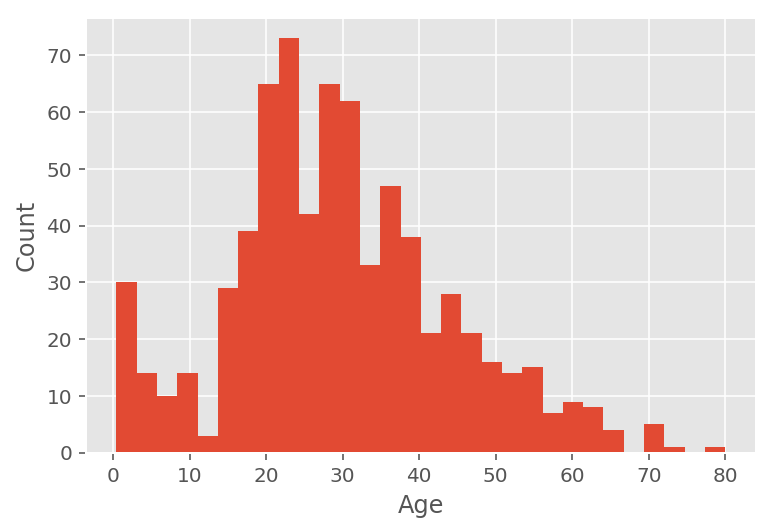

In [7]:
# Age histogram
df.Age.hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
df = df.fillna({'Age': df.Age.median(), })
df.head()

Survived                                               Name     Sex   Age
0         0                            Braund, Mr. Owen Harris    male  22.0
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2         1                             Heikkinen, Miss. Laina  female  26.0
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4         0                           Allen, Mr. William Henry    male  35.0

In [9]:
df = df.astype({
    'Age': 'float64',
    'Name': 'object',
    'Sex': 'category',
    'Survived': 'int64',
})

In [10]:
df = data.extract_title(df)
df.head()

NameError: name 'data' is not defined

In [ ]:
X_train, X_test, y_train, y_test = models.data_preparation(df, test_size=0.2, random_state=0)
models.run_majority_vote(X_train, X_test, y_train, y_test);
models.run_logistic_regression(X_train, X_test, y_train, y_test);